We did binary classification in the previous notebook, we'll do multiclassification using LR now


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.datasets import load_digits  #built-in dataset for Grayscale images of handwritten digits

In [ ]:
digits = load_digits()

In [ ]:
type(digits)  #A bunch just also allows dot notation accessing too, only extra feature, otherwise its just a dict.

sklearn.utils._bunch.Bunch

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data.shape

(1797, 64)

<Figure size 640x480 with 0 Axes>

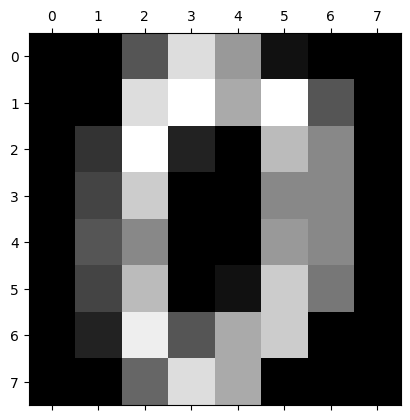

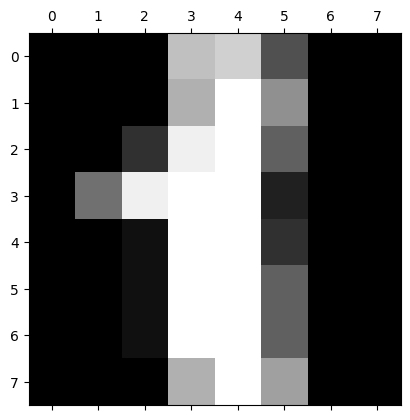

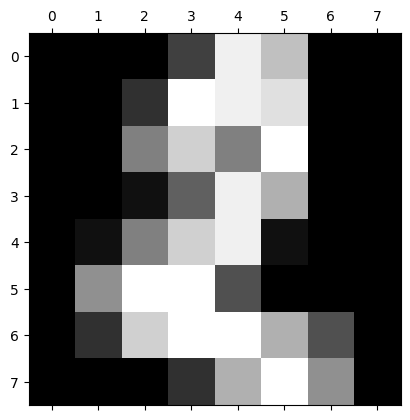

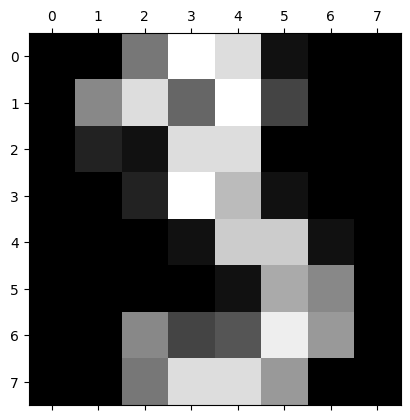

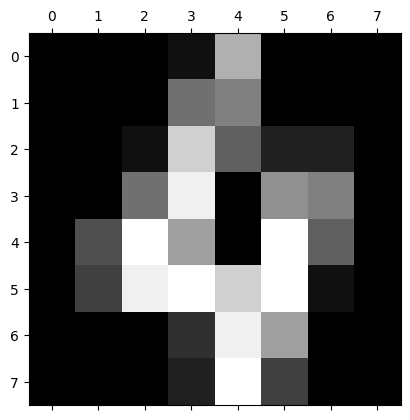

In [ ]:
plt.gray()  #setting the colourmapping to grayscale, otherwise matplotlib uses "virdis" colour mapping
for i in range(5):
  plt.matshow(digits.images[i]) #plots the 3-D matrix into an 8x8 image

In [ ]:
digits.target[:5] #target digits are the same as seen

array([0, 1, 2, 3, 4])

Now we are ready to train our model on data and target


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [ ]:
print(len(x_train))
print(len(x_test))

1437
360


In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
model.score(x_test,y_test)

0.9638888888888889

In [ ]:
#pretty good score, lets try predicting a random sample
model.predict([digits.data[89]])

array([3])

In [ ]:
#lets check the prediction
digits.target[89]

np.int64(3)

In [ ]:
#let's check where our model lacked
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

predicted_values = model.predict(x_test)
cm = confusion_matrix(y_test,predicted_values) #(truth vs the predictions made)

cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 35,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  2],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 37]])

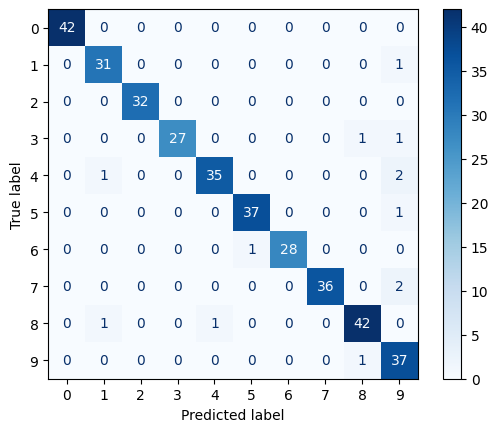

In [ ]:
# x axis - the predicted_value
# y axis - Truth

#plotting a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
'''
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

'''

#just for reference purpose to plot using sns, usually preferred

'\nimport seaborn as sns\nimport pandas as pd\nfrom sklearn.metrics import confusion_matrix\n\ncm = confusion_matrix(y_test, y_pred)\ncm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)\n\nplt.figure(figsize=(6,4))\nsns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")\nplt.ylabel(\'Actual\')\nplt.xlabel(\'Predicted\')\nplt.show()\n\n'